In [ ]:
"""
Purpose: To read in all of the saved off validation dataframes and
display the score

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-30 18:55:40,717 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 18:55:40,720 - settings - Setting database.user to celiib
INFO - 2021-04-30 18:55:40,722 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 18:55:40,725 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-30 18:55:40,726 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 18:55:40,737 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-30 18:55:41,166 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 18:55:41,169 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 18:55:41,170 - settings - Setting database.user to celiib
INFO - 2021-04-30 18:55:41,171 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 18:55:41,172 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 18:55:41,172 - settings - Setting database.user to celiib
INFO - 2021-04-30 18:55:41,173 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 18:55:41,174 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 18:55:41,672 - settings - Setting enable_python_native_blobs to True


In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-30 18:55:41,802 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-30 18:55:41,803 - settings - Setting database.user to celiib
INFO - 2021-04-30 18:55:41,804 - settings - Setting database.password to newceliipass
INFO - 2021-04-30 18:55:41,808 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-30 18:55:42,386 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su
from pathlib import Path
import pandas_utils as pu

# Displaying he score

In [ ]:
"""
Purpose: To read in all of the validation dataframes,
concatenate and then display the overall scores and then the individual scores

Pseudocode:
1) Get the filenames in the validation direction
2) For each filename load up the dataframe
3) concatenate the dataframes into one
4) Display the score

in lower box
5) For each dataframe collected, display the score for the segment_id
"""

# Inspecting Statistics Before Proofreading

In [ ]:
verbose = True

#1) Get the filenames in the validation direction
data_dir = "./baseline_data/"
val_df_files = [k for k in list(Path(data_dir).iterdir()) if "ipynb" not in str(k)
               #and "864691136105493209" not in str(k)
               ]

#2) For each filename load up the dataframe
val_df = [su.decompress_pickle(k) for k in val_df_files]

if verbose:
    print(f"{len(val_df)} Dataframes loaded")

#3) concatenate the dataframes into one
total_val_df = pu.concat(val_df)

vu.synapse_validation_df_to_score_plot(total_val_df)

# Inspecting Statistics After Proofreading

54 Dataframes loaded
Segment Id = 864691135113167769
Postsyn counts:
TP:198422
TN:1119
FP:292
FN:3064
Presyn counts:
TP:1849
TN:8353
FP:387
FN:370


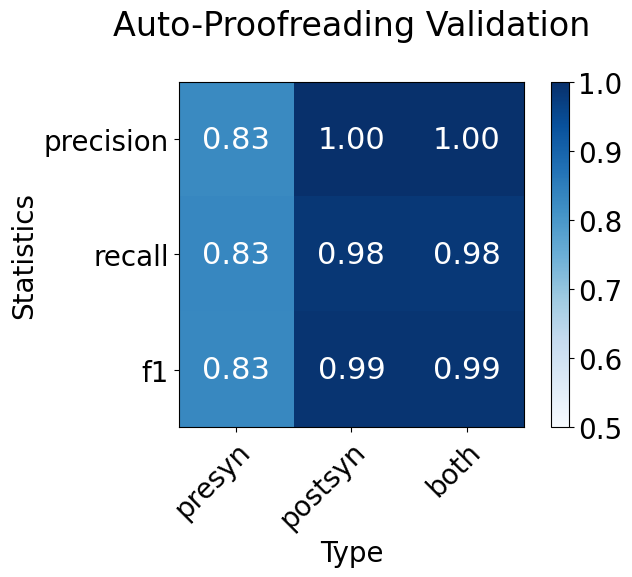

In [26]:
verbose = True

#1) Get the filenames in the validation direction
data_dir = "./validation_data/"
val_df_files = [k for k in list(Path(data_dir).iterdir()) if "ipynb" not in str(k)
               #and "864691136105493209" not in str(k)
               ]

#2) For each filename load up the dataframe
val_df = [su.decompress_pickle(k) for k in val_df_files]

if verbose:
    print(f"{len(val_df)} Dataframes loaded")

#3) concatenate the dataframes into one
total_val_df = pu.concat(val_df)

vu.synapse_validation_df_to_score_plot(total_val_df)

In [ ]:
for v in val_df:
    vu.synapse_validation_df_to_score_plot(v)

In [ ]:
FP_bad_neurons

# With Kiss

In [15]:
FP_bad_neurons = [864691136333790899,
                 864691135974454383,
                 864691135589907979,
                 864691135771629819,
                 864691135212632448,
                 864691136194103510,
                 864691135866394390]
FP_bad_neurons = []
bad_threshold = 25
for v in val_df:
    s_dict = vu.synapse_validation_df_to_category_counts(v)["presyn"]
    seg_id = vu.validation_df_to_old_segment_id(v)
    FP_score = s_dict['FP']
    FN_score = s_dict['FN']
    #print(f"{seg_id}: FP = {FP_score}, FN = {FN_score}")
    print(f"{seg_id}: {s_dict}")
    if FP_score > bad_threshold:# or FN_score > bad_threshold:
        FP_bad_neurons.append(seg_id)

864691135491233631: {'TP': 13, 'TN': 140, 'FP': 0, 'FN': 0}
864691136370815112: {'TP': 6, 'TN': 3, 'FP': 4, 'FN': 1}
864691135974454639: {'TP': 2, 'TN': 108, 'FP': 0, 'FN': 0}
864691135925564174: {'TP': 8, 'TN': 82, 'FP': 1, 'FN': 0}
864691135348272855: {'TP': 40, 'TN': 372, 'FP': 15, 'FN': 8}
864691136333790899: {'TP': 76, 'TN': 113, 'FP': 3, 'FN': 0}
864691135740225387: {'TP': 31, 'TN': 401, 'FP': 2, 'FN': 1}
864691136333776819: {'TP': 7, 'TN': 14, 'FP': 0, 'FN': 0}
864691135564655959: {'TP': 6, 'TN': 69, 'FP': 0, 'FN': 5}
864691135272164113: {'TP': 31, 'TN': 153, 'FP': 0, 'FN': 0}
864691136105498585: {'TP': 233, 'TN': 0, 'FP': 4, 'FN': 8}
864691136008573614: {'TP': 8, 'TN': 68, 'FP': 0, 'FN': 37}
864691136175008774: {'TP': 105, 'TN': 145, 'FP': 15, 'FN': 0}
864691135645592260: {'TP': 28, 'TN': 105, 'FP': 8, 'FN': 7}
864691136618412685: {'TP': 23, 'TN': 95, 'FP': 4, 'FN': 0}
864691136535575714: {'TP': 0, 'TN': 50, 'FP': 0, 'FN': 3}
864691135945413668: {'TP': 0, 'TN': 99, 'FP': 0, 'FN

In [ ]:
FP_bad_neurons